In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan


In [ ]:
# Load data
MR1 = pd.read_excel("/content/MR1.xlsx")

# Display structure
print(MR1.info())

# Define your features and target
X = MR1[['Awarness', 'Attitude', 'Perception', 'Cost', 'Rating']]
y = MR1['Buying']

# Add constant for intercept
X = sm.add_constant(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Attitude    322 non-null    float64
 1   Awarness    322 non-null    float64
 2   Perception  322 non-null    float64
 3   Cost        322 non-null    float64
 4   Rating      322 non-null    float64
 5   Buying      322 non-null    float64
dtypes: float64(6)
memory usage: 15.2 KB
None


                            OLS Regression Results                            
Dep. Variable:                 Buying   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     401.3
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          1.65e-134
Time:                        09:47:13   Log-Likelihood:                -143.71
No. Observations:                 322   AIC:                             299.4
Df Residuals:                     316   BIC:                             322.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4171      0.109      3.842      0.0

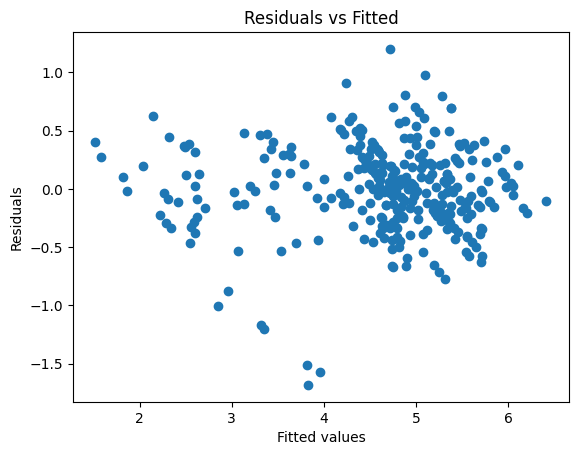

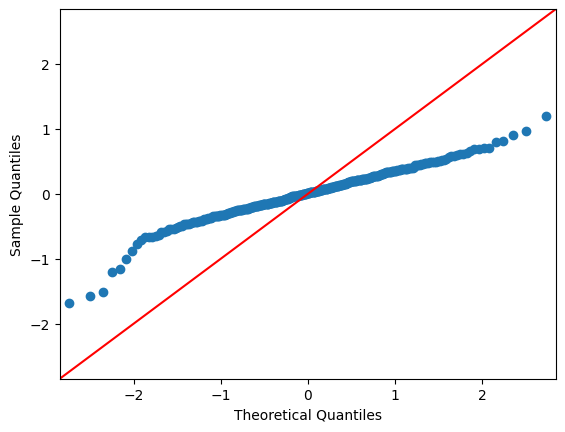

In [ ]:
# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Model with fewer predictors
X1 = sm.add_constant(MR1[['Awarness', 'Attitude', 'Perception']])
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

# Diagnostic Plots
# Residuals vs Fitted
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Normal Q-Q plot
sm.qqplot(model.resid, line='45')
plt.show()

In [ ]:
# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Durbin-Watson test for autocorrelation
print('Durbin-Watson statistic:', durbin_watson(model.resid))

# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan test p-value:', bp_test[1])

      feature        VIF
0       const  26.059033
1    Awarness   4.543297
2    Attitude   3.732014
3  Perception   3.057695
4        Cost   1.236130
5      Rating   1.336555
Durbin-Watson statistic: 2.1217480237697304
Breusch-Pagan test p-value: 0.000678916362691654
